# EM-DAT Data Cleanup 1900-2023 

CSCI 4622 | Team Disaster

This notebook is responsible for the cleanup process of the EM-DAT database from 1900-2023.

# Data Acquisition

In [1]:
# Import necessary libraries for Data cleaning
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
file_path = './data/public_emdat_1900-2024.csv'
data = pd.read_csv(file_path)
data.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1098720.0,2.730451,NaN,2004-10-18,2023-10-17
1,1900-0005-USA,Yes,tec-ind-fir-fir,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25


# Data Understanding

In [2]:
# Basic data information
data.info()

# Display basic statistics
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26793 entries, 0 to 26792
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     26793 non-null  object 
 1   Historic                                   26793 non-null  object 
 2   Classification Key                         26793 non-null  object 
 3   Disaster Group                             26793 non-null  object 
 4   Disaster Subgroup                          26793 non-null  object 
 5   Disaster Type                              26793 non-null  object 
 6   Disaster Subtype                           26793 non-null  object 
 7   External IDs                               2492 non-null   object 
 8   Event Name                                 8398 non-null   object 
 9   ISO                                        26793 non-null  object 
 10  Country               

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
count,26793,26793,26793,26793,26793,26793,26793,2492,8398,26793,...,4.200000e+01,4.200000e+01,1.138000e+03,1.125000e+03,5.765000e+03,5.722000e+03,26368.000000,8485,26793,26793
unique,26793,2,67,2,9,32,67,1884,3631,232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6959,2617,142
top,1900-0003-USA,No,tec-tra-roa-roa,Natural,Hydrological,Flood,Road,GLIDE:CW-2012-000006,Cholera,CHN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":925,""adm1_name"":""Taiwan Sheng""}]",2003-07-01,2023-09-25
freq,1,16017,2925,17244,6852,6007,2925,29,505,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,9374,24985
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.367314e+06,6.639464e+06,9.205839e+05,1.302049e+06,8.026137e+05,1.281373e+06,57.476863,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.587693e+07,1.699672e+07,3.672429e+06,4.914277e+06,4.952952e+06,7.115101e+06,23.067487,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.400000e+01,1.310000e+02,3.400000e+01,4.800000e+01,2.000000e+00,3.000000e+00,2.730451,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.312500e+04,9.772000e+04,5.000000e+04,9.533300e+04,8.000000e+03,1.720800e+04,44.696722,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.445000e+05,5.375475e+05,1.750000e+05,2.681860e+05,6.000000e+04,1.246500e+05,59.033144,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.133000e+06,4.422531e+06,5.475000e+05,8.420930e+05,3.380000e+05,6.244882e+05,75.350386,NaN,NaN,NaN


# Data Cleaning -  Removing Scarce Feature Data

External IDs                                 24301
Event Name                                   18395
Location                                      2470
Origin                                       22292
Associated Types                             22827
AID Contribution ('000 US$)                  26005
Magnitude                                    21665
Magnitude Scale                              10016
Latitude                                     23997
Longitude                                    23997
River Basin                                  25389
Start Month                                    504
Start Day                                     4052
End Month                                      812
End Day                                       3963
Total Deaths                                  5499
No. Injured                                  18040
No. Affected                                 15676
No. Homeless                                 24119
Total Affected                 

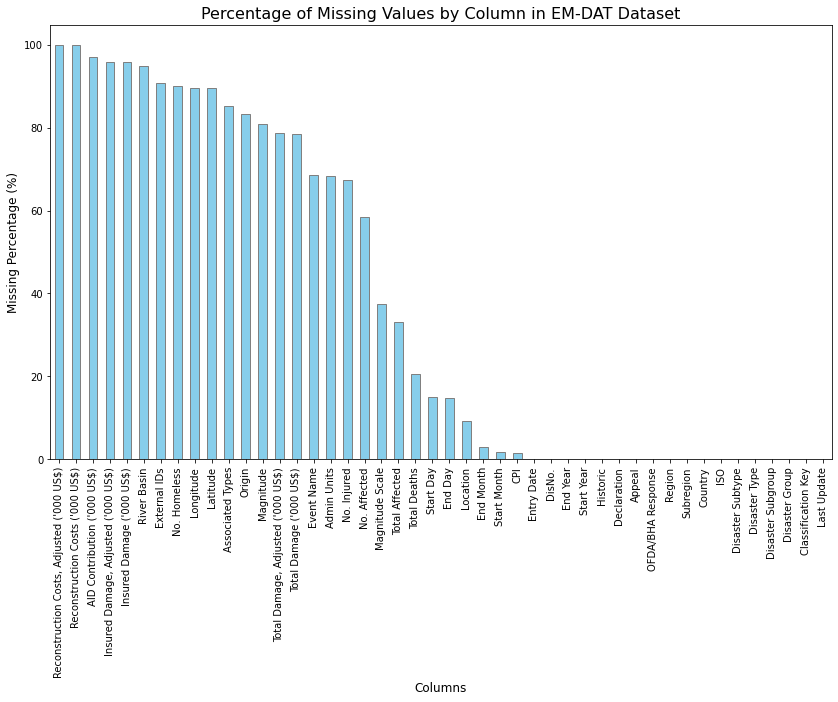

In [3]:
# --------------------- Check for missing values ---------------------#

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

print()
# Check for duplicates
duplicates = data.duplicated().sum()
if duplicates == 0:
    print("No duplicates!")
    
else:
    print("Remove duplicates!")
    
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100

# Plot the missing data percentage for each column as a bar chart
plt.figure(figsize=(14, 8))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='gray')
plt.title('Percentage of Missing Values by Column in EM-DAT Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [4]:
# Remove features that do not meet the threshold of missing values
missing_threshold = 0.70

# Extract the features
features = data.columns
number_dropped_cols = 0

# Initialize an empty list for dropped features
dropped_features = []

# Iterate through each feature checking if it does not meet the missing value threshold. Drop the column and add the 
# dropped column to its list
for feature in features:
    if (data[feature].isnull().sum() / len(data)) > missing_threshold:
        data = data.drop(feature, axis=1)
        number_dropped_cols += 1
        dropped_feature = feature
        dropped_features.append(dropped_feature)

In [5]:
# Set the cleaned data to the new data set and print the updated feature list
cleaned_data = data
print("Number of dropped features: ", number_dropped_cols)
print("\nDropped features: ", dropped_features)

print(len(cleaned_data.columns))

Number of dropped features:  15

Dropped features:  ['External IDs', 'Origin', 'Associated Types', "AID Contribution ('000 US$)", 'Magnitude', 'Latitude', 'Longitude', 'River Basin', 'No. Homeless', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)"]
31


# Data Cleaning - Data Imputation

In [6]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# # Identify features with missing values
# features_with_missing = [feature for feature in cleaned_data.columns if cleaned_data[feature].isnull().sum() > 0]

# # Set the number of columns for subplots (adjust as needed)
# n_cols = 3
# n_rows = math.ceil(len(features_with_missing) / n_cols)  # Calculate required rows

# # Create subplots grid
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size as necessary
# axes = axes.flatten()  # Flatten axes array to easily iterate over

# # Loop through each feature and plot in its corresponding subplot
# for i, feature in enumerate(features_with_missing):
#     if cleaned_data[feature].dtype == 'object':  # Categorical feature
#         sns.countplot(x=feature, data=cleaned_data, ax=axes[i])
#         axes[i].set_title(f'Count plot for {feature} (Categorical)')
#     else:  # Numerical feature
#         sns.histplot(cleaned_data[feature], kde=True, ax=axes[i])
#         axes[i].set_title(f'Histogram for {feature} (Numerical)')
    
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Frequency')

# # Hide any unused subplots
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Event Name
Location
Magnitude Scale
Start Month
Start Day
End Month
End Day
Total Deaths
No. Injured
No. Affected
Total Affected
CPI
Admin Units


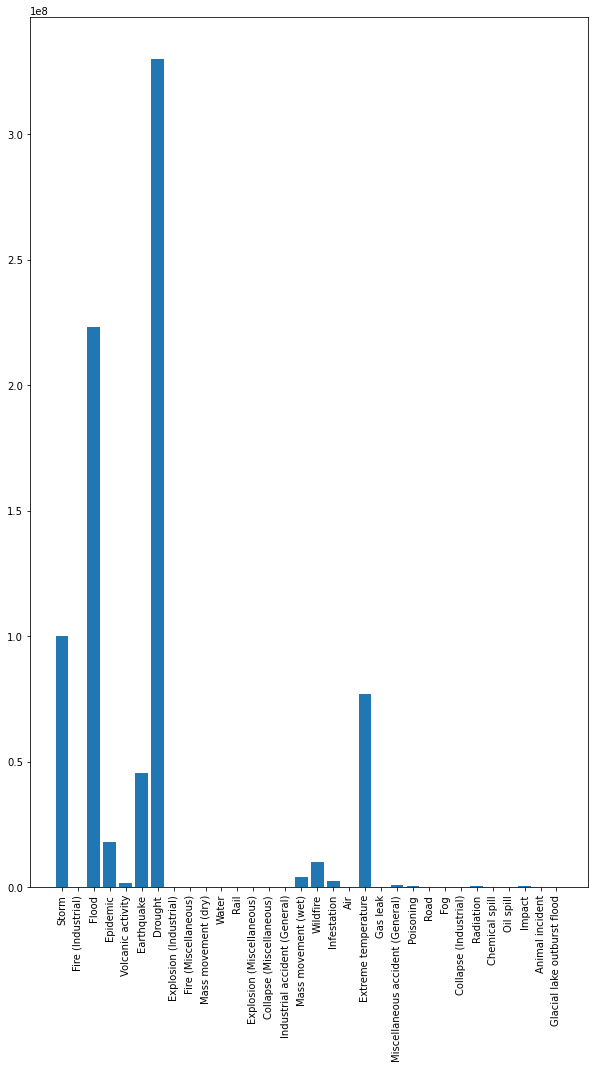

In [7]:
features = cleaned_data.columns
for feature in features:
    if (cleaned_data[feature].isnull().sum() > 0):
        print(feature)
        
    #if cleaned_data[feature].dtype == 'object':

plt.figure(figsize=(10,16))

plt.bar(cleaned_data['Disaster Type'], cleaned_data['No. Affected'])
plt.xticks(rotation=90)
plt.show()
# if cleaned_data[feature].dtype != 'object':
#     for i, feature in enumerate(features):
#         plt.subplot(4, 4, i+1)
#         plt.plot(cleaned_data[feature], cleaned_data['No. Affected'])
        
# plt.tight_layout()

# plt.show()

In [8]:
# Extract the categorical columns
cat_cols = cleaned_data.select_dtypes(include=['object']).columns

# Extract the numerical columns
num_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns

# Categorical Features: Fill with the Mode value
for cat_col in cat_cols:
    cleaned_data[cat_col].fillna(cleaned_data[cat_col].mode()[0], inplace=True)
    
# Numerical Features: Use Multiple Imputation to fill in missing data using multiple regression models
imputer = IterativeImputer(max_iter=10, random_state=0)
for num_col in num_cols:
    cleaned_data[[num_col]] = imputer.fit_transform(data[[num_col]])

In [9]:
# Confirming that there are no missing values left
missing_after_imputation = data.isnull().sum()
missing_after_imputation

DisNo.                0
Historic              0
Classification Key    0
Disaster Group        0
Disaster Subgroup     0
Disaster Type         0
Disaster Subtype      0
Event Name            0
ISO                   0
Country               0
Subregion             0
Region                0
Location              0
OFDA/BHA Response     0
Appeal                0
Declaration           0
Magnitude Scale       0
Start Year            0
Start Month           0
Start Day             0
End Year              0
End Month             0
End Day               0
Total Deaths          0
No. Injured           0
No. Affected          0
Total Affected        0
CPI                   0
Admin Units           0
Entry Date            0
Last Update           0
dtype: int64

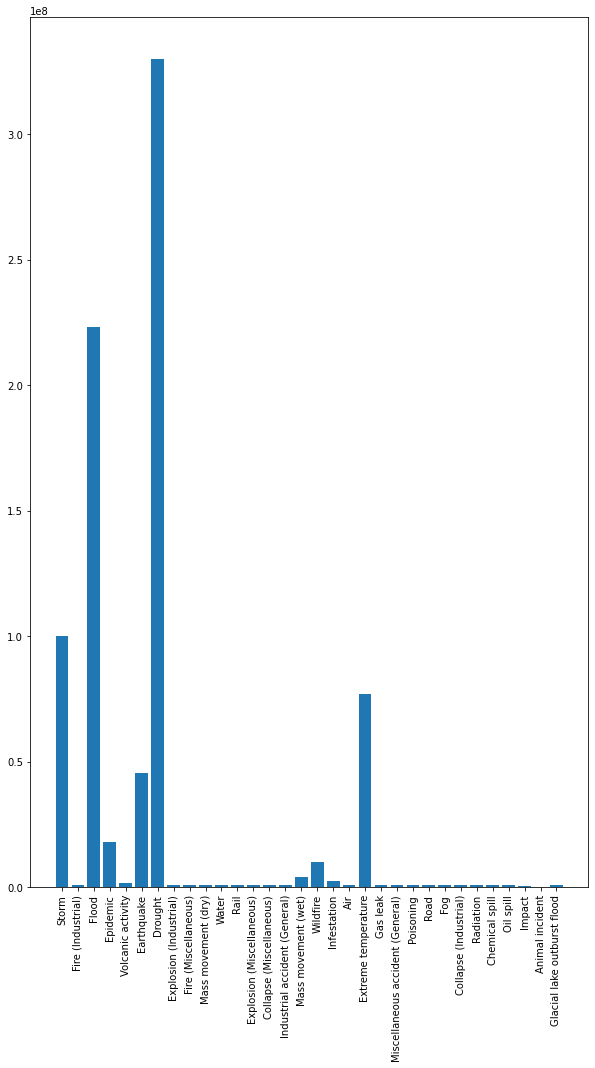

In [10]:
plt.figure(figsize=(10,16))

plt.bar(cleaned_data['Disaster Type'], cleaned_data['No. Affected'])
plt.xticks(rotation=90)
plt.show()

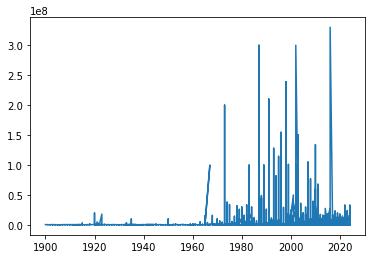

In [11]:
plt.plot(cleaned_data["End Year"], cleaned_data["Total Affected"])

# Create new cleaned dataset

In [13]:
# Ensure the 'data' folder exists
output_folder = 'data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
# Define the path for the new cleaned CSV file
output_path = os.path.join(output_folder, 'emdata_1900_2024_cleaned.csv')

# Write the cleaned data to the new CSV file
cleaned_data.to_csv(output_path, index=False)